In [ ]:
from datetime import datetime
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns

In [ ]:
import pandas as pd
data= pd.read_csv("MicrosoftStock.csv")
data.head()
data.dropna()
data_num= data.select_dtypes(include=np.number)

In [ ]:
data.shape

(1259, 8)

In [ ]:
data.isnull().any()

index     False
date      False
open      False
high      False
low       False
close     False
volume    False
Name      False
dtype: bool

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1259 non-null   int64  
 1   date    1259 non-null   object 
 2   open    1259 non-null   float64
 3   high    1259 non-null   float64
 4   low     1259 non-null   float64
 5   close   1259 non-null   float64
 6   volume  1259 non-null   int64  
 7   Name    1259 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 78.8+ KB


In [ ]:
data.describe()

,index,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,390827.000000,51.026394,51.436007,50.630397,51.063081,3.386946e+07
std,363.586303,14.859387,14.930144,14.774630,14.852117,1.958979e+07
min,390198.000000,27.350000,27.600000,27.230000,27.370000,7.425603e+06
25%,390512.500000,40.305000,40.637500,39.870000,40.310000,2.254879e+07
50%,390827.000000,47.440000,47.810000,47.005000,47.520000,2.938758e+07
75%,391141.500000,59.955000,60.435000,59.275000,59.730000,3.842024e+07
max,391456.000000,95.140000,96.070000,93.720000,95.010000,2.483542e+08


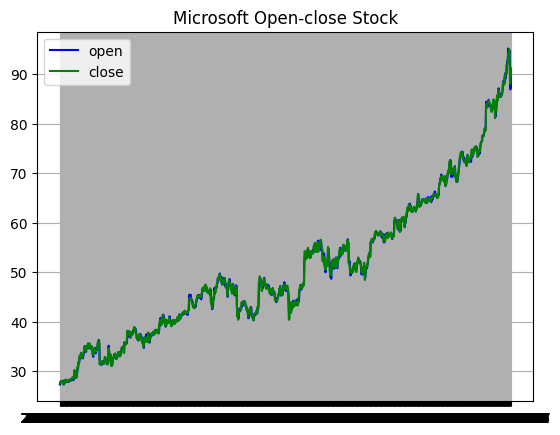

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime
plt.plot(data['date'],data['open'],color="blue",label="open")
plt.plot(data['date'],data['close'],color="green",label="close")
plt.title("Microsoft Open-close Stock")
plt.legend()
plt.grid()

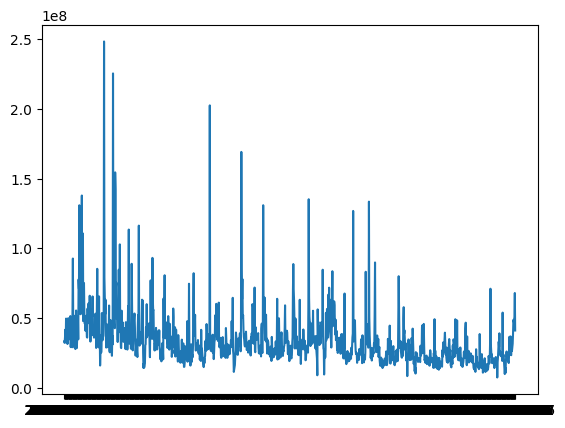

In [ ]:
plt.plot(data['date'],data['volume'])
plt.show()

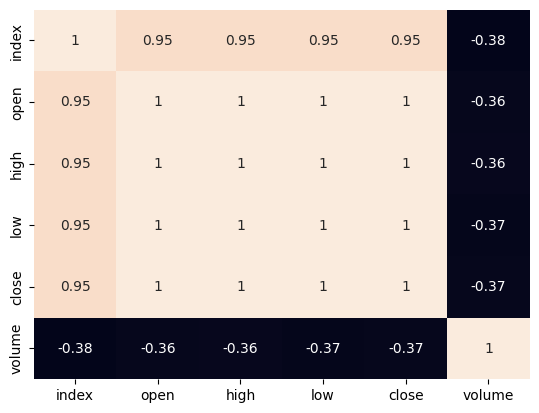

In [ ]:
sns.heatmap(data_num.corr(),
			annot=True,
			cbar=False)
plt.show()


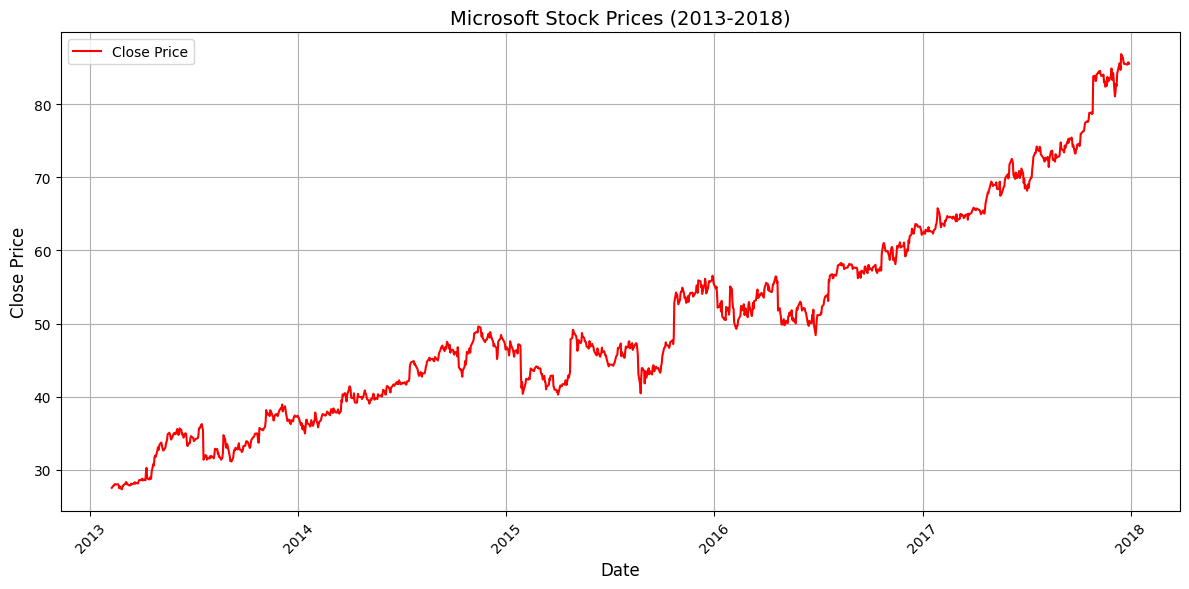

In [ ]:
data['date'] = pd.to_datetime(data['date'])
prediction = data.loc[(data['date'] > datetime(2013, 1, 1)) & (data['date'] < datetime(2018, 1, 1))]
plt.figure(figsize=(12,6))
plt.plot(prediction['date'], prediction['close'], color='r', label='Close Price')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Close Price", fontsize=12)
plt.title("Microsoft Stock Prices (2013-2018)", fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
msft_close = data.filter(['close'])
dataset = msft_close.values
training = int(np.ceil(len(dataset) * .95))
ss = StandardScaler()
ss = ss.fit_transform(dataset)
train_data = ss[0:int(training), :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
data = {
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'output': np.random.rand(100) * 10
}
df = pd.DataFrame(data)



In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['feature1', 'feature2', 'output']])

In [ ]:
X = scaled_data[:, :2]
y = scaled_data[:, 2]

In [ ]:
X = X.reshape(X.shape[0], 1, X.shape[1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
3/3 [==============================] - 3s 321ms/step - loss: 0.3164 - val_loss: 0.4038
Epoch 2/50
3/3 [==============================] - 0s 18ms/step - loss: 0.2984 - val_loss: 0.3841
Epoch 3/50
3/3 [==============================] - 0s 19ms/step - loss: 0.2815 - val_loss: 0.3651
Epoch 4/50
3/3 [==============================] - 0s 20ms/step - loss: 0.2651 - val_loss: 0.3469
Epoch 5/50
3/3 [==============================] - 0s 21ms/step - loss: 0.2496 - val_loss: 0.3294
Epoch 6/50
3/3 [==============================] - 0s 18ms/step - loss: 0.2340 - val_loss: 0.3127
Epoch 7/50
3/3 [==============================] - 0s 19ms/step - loss: 0.2199 - val_loss: 0.2964
Epoch 8/50
3/3 [==============================] - 0s 18ms/step - loss: 0.2061 - val_loss: 0.2807
Epoch 9/50
3/3 [==============================] - 0s 19ms/step - loss: 0.1927 - val_loss: 0.2656
Epoch 10/50
3/3 [==============================] - 0s 19ms/step - loss: 0.1807 - val_loss: 0.2510
Epoch 11/50
3/3 [===========

In [ ]:
mse = model.evaluate(X_test, y_test)
print("Mean Squared Error:", mse)

1/1 [==============================] - 0s 40ms/step - loss: 0.1171
Mean Squared Error: 0.11710667610168457
